## **US Accidents Exploratory Data Analysis**

## **Data Preparation**

### **Import Libraries**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

### **Read and load Dataset**

In [4]:
data=r'/content/drive/MyDrive/Colab Notebooks/Assignments/US_Accidents_March23_2.csv'

In [5]:
df=pd.read_csv(data)

In [ ]:
df

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,08-02-2016 05:46,08-02-2016 11:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,08-02-2016 06:07,08-02-2016 06:37,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,08-02-2016 06:49,08-02-2016 07:19,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,08-02-2016 07:23,08-02-2016 07:53,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,08-02-2016 07:39,08-02-2016 08:09,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,A-100002,Source2,3,05-04-2016 15:52,05-04-2016 16:52,32.731979,-117.111244,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
99996,A-100003,Source2,3,05-04-2016 15:57,05-04-2016 16:57,33.913029,-118.125389,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
99997,A-100004,Source2,2,05-04-2016 16:02,05-04-2016 17:02,34.121517,-117.536896,NaN,NaN,0.00,...,False,False,False,False,True,False,Day,Day,Day,Day
99998,A-100005,Source3,2,05-04-2016 16:01,05-04-2016 17:01,33.995079,-117.361183,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day


### **Initial Data Exploration**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     100000 non-null  object 
 1   Source                 100000 non-null  object 
 2   Severity               100000 non-null  int64  
 3   Start_Time             100000 non-null  object 
 4   End_Time               100000 non-null  object 
 5   Start_Lat              100000 non-null  float64
 6   Start_Lng              100000 non-null  float64
 7   End_Lat                0 non-null       float64
 8   End_Lng                0 non-null       float64
 9   Distance(mi)           100000 non-null  float64
 10  Description            100000 non-null  object 
 11  Street                 100000 non-null  object 
 12  City                   99999 non-null   object 
 13  County                 100000 non-null  object 
 14  State                  100000 non-nul

In [ ]:
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
df.shape

(100000, 46)

In [ ]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,100000.000000,100000.000000,100000.000000,0.0,0.0,100000.000000,98409.000000,4322.000000,98144.000000,98708.000000,98154.000000,76180.000000,7368.000000
mean,2.448120,35.630369,-119.322756,NaN,NaN,0.011345,66.641262,48.845812,59.794170,29.961021,9.338639,8.044165,0.025786
std,0.499931,2.101259,3.663525,NaN,NaN,0.262244,12.703846,19.898270,23.184442,0.275672,1.885828,4.298926,0.051695
min,1.000000,32.542587,-123.813927,NaN,NaN,0.000000,3.200000,-8.400000,4.000000,2.980000,0.100000,0.000000,0.000000
25%,2.000000,33.957775,-121.828468,NaN,NaN,0.000000,57.900000,37.100000,43.000000,29.890000,10.000000,4.600000,0.000000
50%,2.000000,34.168579,-118.384232,NaN,NaN,0.000000,66.000000,42.500000,62.000000,29.970000,10.000000,6.900000,0.000000
75%,3.000000,37.776682,-117.916023,NaN,NaN,0.010000,75.000000,63.000000,78.000000,30.060000,10.000000,10.400000,0.030000
max,4.000000,41.428753,-81.550728,NaN,NaN,51.130000,114.100000,107.000000,100.000000,33.040000,80.000000,241.700000,0.550000


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df=df.select_dtypes(include=numerics)
len(numeric_df.columns)

13

### **Percentage of missing values per column**

In [ ]:
missing_percentages=df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages

End_Lat                  1.00000
End_Lng                  1.00000
Wind_Chill(F)            0.95678
Precipitation(in)        0.92632
Wind_Speed(mph)          0.23820
Humidity(%)              0.01856
Visibility(mi)           0.01846
Weather_Condition        0.01604
Temperature(F)           0.01591
Pressure(in)             0.01292
Wind_Direction           0.01064
Weather_Timestamp        0.01054
Airport_Code             0.00007
Zipcode                  0.00007
Timezone                 0.00007
Sunrise_Sunset           0.00001
Civil_Twilight           0.00001
Nautical_Twilight        0.00001
Astronomical_Twilight    0.00001
City                     0.00001
Country                  0.00000
Junction                 0.00000
Severity                 0.00000
Start_Time               0.00000
End_Time                 0.00000
Turning_Loop             0.00000
Traffic_Signal           0.00000
Traffic_Calming          0.00000
Stop                     0.00000
Station                  0.00000
Roundabout

In [ ]:
type(missing_percentages)

pandas.core.series.Series

<Axes: >

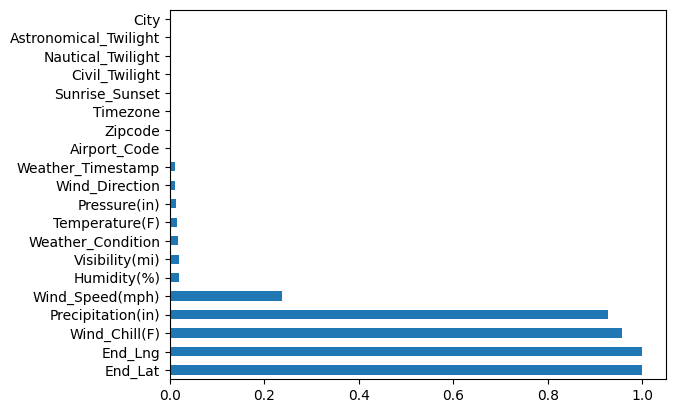

In [ ]:
missing_percentages[missing_percentages!=0].plot(kind='barh')

## **Exploratory Analysis and Vizualization**

Columns to analyse:

1.   city
2.   start time
3.   Start Lat,Start Lng



### City


#### States taken into Consideration

In [104]:
 df.State.unique()

array(['OH', 'WV', 'CA'], dtype=object)

####**Cities taken into Consideration**

In [ ]:
df.City

0                  Dayton
1            Reynoldsburg
2            Williamsburg
3                  Dayton
4                  Dayton
               ...       
99995           San Diego
99996              Downey
99997    Rancho Cucamonga
99998           Riverside
99999            Whittier
Name: City, Length: 100000, dtype: object

####**Total number of unique Cities taken into consideration**

In [ ]:
unique_city=df.City.unique()
len(unique_city)

786

#### **Checking existance of Top 2 Cities by Population in DataSet**

In [96]:
check_Houston_NY=df[(df['City']=='Houston')| (df['City']=='New York')].sum()
check_Houston_NY

ID                       0.0
Source                   0.0
Severity                 0.0
Start_Time               0.0
End_Time                 0.0
Start_Lat                0.0
Start_Lng                0.0
End_Lat                  0.0
End_Lng                  0.0
Distance(mi)             0.0
Description              0.0
Street                   0.0
City                     0.0
County                   0.0
State                    0.0
Zipcode                  0.0
Country                  0.0
Timezone                 0.0
Airport_Code             0.0
Weather_Timestamp        0.0
Temperature(F)           0.0
Wind_Chill(F)            0.0
Humidity(%)              0.0
Pressure(in)             0.0
Visibility(mi)           0.0
Wind_Direction           0.0
Wind_Speed(mph)          0.0
Precipitation(in)        0.0
Weather_Condition        0.0
Amenity                  0.0
Bump                     0.0
Crossing                 0.0
Give_Way                 0.0
Junction                 0.0
No_Exit       

In [ ]:
'Houston' in df.City

False

In [ ]:
df['City'].value_counts().get('Houston', 0)

0

In [ ]:
'New York' in df.City

False

In [100]:
df['City'].value_counts().get('New York',0)

0

In [90]:
dum=df[df['City'].str.contains('^New Y', na=False, regex=True)]
dum['City']

Series([], Name: City, dtype: object)

####Accidents per City

In [6]:
cities_by_accidents=df.City.value_counts()
cities_by_accidents

Los Angeles       9792
Sacramento        5223
San Diego         3275
San Jose          3026
Oakland           1802
                  ... 
Millersport          1
New Carlisle         1
Owensville           1
London               1
Imperial Beach       1
Name: City, Length: 785, dtype: int64

####**Top 50 Cities with Highest Number of Accidents**

In [147]:
cities_by_accidents[:50]

Los Angeles         9792
Sacramento          5223
San Diego           3275
San Jose            3026
Oakland             1802
Long Beach          1343
San Francisco       1287
Riverside           1261
Corona              1095
Whittier            1019
Anaheim              952
San Bernardino       952
Hayward              934
Stockton             886
Fremont              770
Tracy                753
Ontario              749
Santa Rosa           745
Baldwin Park         744
Livermore            685
Fairfield            664
Gardena              647
Pomona               639
Diamond Bar          604
Irvine               596
Pasadena             588
Sherman Oaks         567
Rowland Heights      558
Downey               544
Cerritos             535
Los Gatos            532
La Puente            532
Pleasanton           518
San Mateo            506
Santa Ana            491
Compton              488
San Leandro          482
Inglewood            478
Orange               469
Norwalk              454


<Axes: >

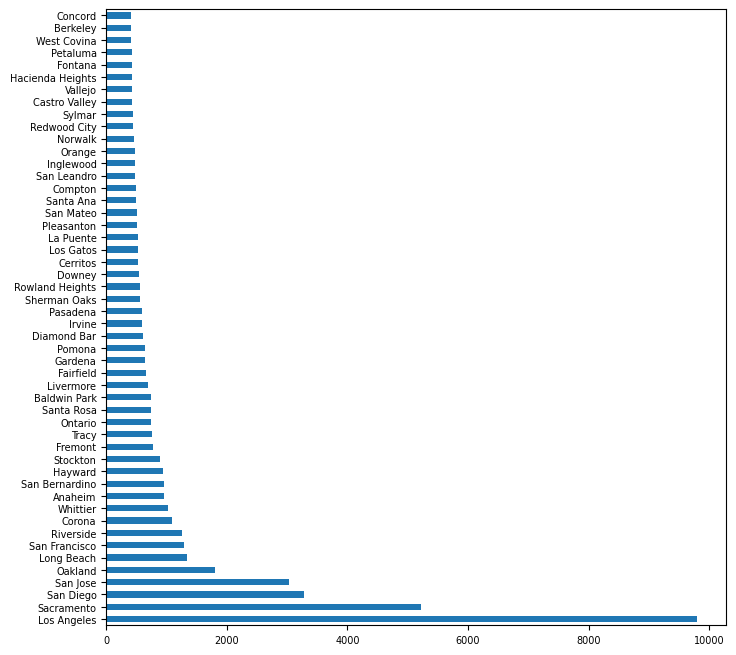

In [143]:
plt.figure(figsize=(8, 8))
cities_by_accidents[:50].plot(kind='barh', fontsize=7)

####**Distribution of Accidents per City**

<ipython-input-24-191a5e80678e>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accidents)


<Axes: xlabel='City', ylabel='Density'>

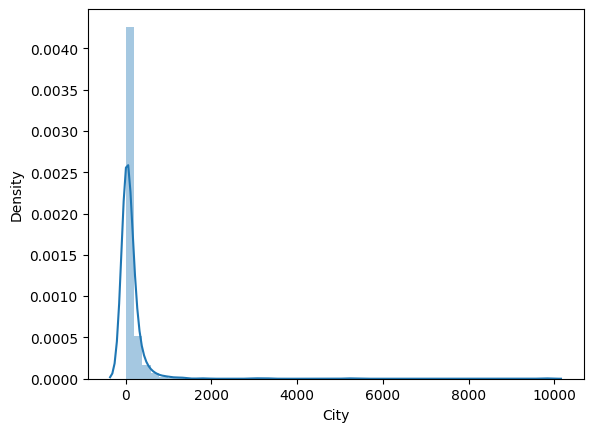

In [24]:
sns.distplot(cities_by_accidents)

Percentage of Cities with most number of Cases

In [15]:
high_accident_cities=cities_by_accidents[cities_by_accidents >=1000]
len(high_accident_cities)

10

In [17]:
(len(high_accident_cities)/len(df.City))*100

0.01

Cities with Least number of Cases

In [28]:
cities_by_accidents[cities_by_accidents<10]

Mt Baldy          9
Cherry Valley     9
Angelus Oaks      9
Universal City    9
Cedar Glen        9
                 ..
Millersport       1
New Carlisle      1
Owensville        1
London            1
Imperial Beach    1
Name: City, Length: 270, dtype: int64

## **Start Time**

####**Convert Column to DateTime Datatype**

In [53]:
df.Start_Time[0]

Timestamp('2016-08-02 05:46:00')

In [36]:
df.Start_Time.dtype

dtype('O')

In [7]:
df.Start_Time=pd.to_datetime(df.Start_Time)

In [60]:
df.Start_Time[0]

'08-02-2016 05:46'

In [8]:
df.Start_Time.dtype

dtype('<M8[ns]')

####**Percentage of Accidents Per Hour**

In [9]:
df.Start_Time.dt.hour

0         5
1         6
2         6
3         7
4         7
         ..
99995    15
99996    15
99997    16
99998    16
99999    16
Name: Start_Time, Length: 100000, dtype: int64

In [27]:
count_hr=df.Start_Time.dt.hour.value_counts(normalize=True).sort_index()*100
count_hr

0     2.240
1     1.895
2     1.895
3     1.507
4     1.303
5     1.516
6     1.378
7     2.196
8     3.142
9     5.291
10    7.285
11    7.910
12    6.219
13    5.137
14    5.208
15    4.707
16    5.293
17    5.035
18    6.144
19    6.722
20    7.404
21    4.970
22    3.773
23    1.830
Name: Start_Time, dtype: float64

<Axes: xlabel='Start_Time', ylabel='Probability'>

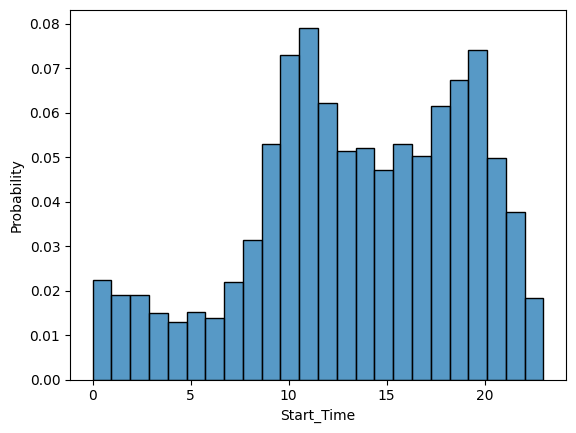

In [39]:
sns.histplot(df.Start_Time.dt.hour,bins=24,stat='probability')

#### Percentage of Accidents for each Day of the Week

In [41]:
df.Start_Time.dt.dayofweek

0        1
1        1
2        1
3        1
4        1
        ..
99995    2
99996    2
99997    2
99998    2
99999    2
Name: Start_Time, Length: 100000, dtype: int64

<Axes: xlabel='Start_Time', ylabel='Probability'>

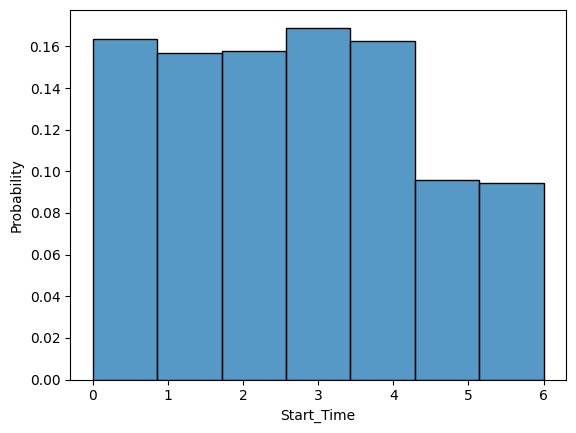

In [43]:
sns.histplot(df.Start_Time.dt.dayofweek,bins=7,stat='probability')

####**Accident distribution during the Weekend**

In [53]:
[(df.Start_Time.dt.dayofweek==5) | (df.Start_Time.dt.dayofweek==6)]

[0        False
 1        False
 2        False
 3        False
 4        False
          ...  
 99995    False
 99996    False
 99997    False
 99998    False
 99999    False
 Name: Start_Time, Length: 100000, dtype: bool]

In [67]:
df.Start_Time[df.Start_Time.dt.dayofweek.isin([5, 6])].dt.hour

71        6
72        6
73        6
74        6
75        7
         ..
98088    23
98089    23
98090    23
98091    23
98092    23
Name: Start_Time, Length: 19050, dtype: int64

In [64]:
Weekend_start_time = df.Start_Time[(df.Start_Time.dt.dayofweek == 5) | (df.Start_Time.dt.dayofweek == 6)]
hours_of_weekend_start_time = Weekend_start_time.dt.hour

<Axes: xlabel='Start_Time', ylabel='Probability'>

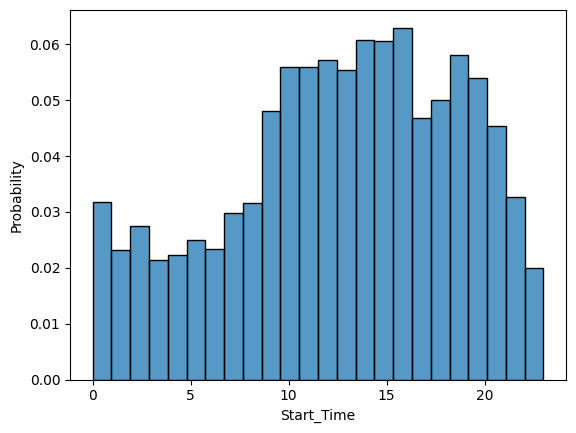

In [65]:
sns.histplot(hours_of_weekend_start_time,bins=24,stat='probability')

####**Accident Distribution during Weekday(Monday)**

In [69]:
monday_stary_time=df.Start_Time[df.Start_Time.dt.dayofweek.isin([0])].dt.hour
monday_stary_time

140       4
141       5
142       5
143       6
144       7
         ..
99829    21
99830    21
99831    23
99832    23
99833    23
Name: Start_Time, Length: 16340, dtype: int64

<Axes: xlabel='Start_Time', ylabel='Probability'>

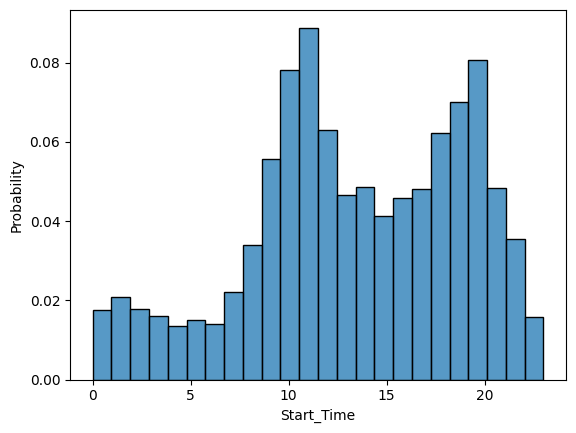

In [70]:
sns.histplot(monday_stary_time,bins=24,stat='probability')

#### **Accident distribution Per Month**

In [71]:
df.Start_Time.dt.month

0        8
1        8
2        8
3        8
4        8
        ..
99995    5
99996    5
99997    5
99998    5
99999    5
Name: Start_Time, Length: 100000, dtype: int64

<Axes: xlabel='Start_Time', ylabel='Probability'>

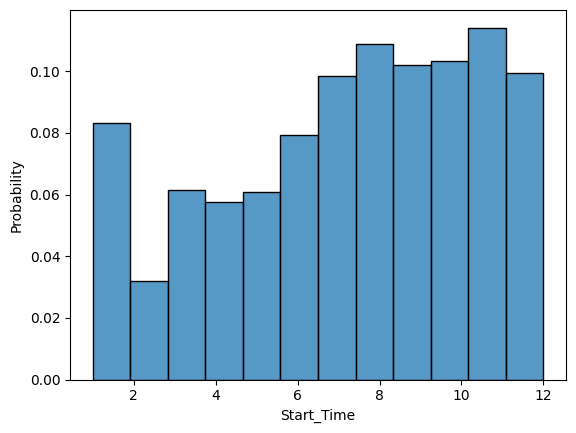

In [73]:
sns.histplot(df.Start_Time.dt.month,bins=12,stat='probability')

## **Start Lat and Long**

#### **Distribustion of Accidents across Regions of Selected States**

In [84]:
lat,lon=df.Start_Lat[0],df.Start_Lng[0]
lat,lon

(39.865147, -84.058723)

In [89]:
map=folium.Map()
marker= folium.Marker((lat,lon))
marker.add_to(map)

In [93]:
map=folium.Map()
HeatMap(zip(list(df.Start_Lat),list(df.Start_Lng))).add_to(map)
map

##**Summary**